In [15]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt

In [16]:
import seaborn as sns

In [17]:
import os
print(os.getcwd())


d:\projects\health_analyzer\notebooks


In [18]:
df = pd.read_csv('../Data/heart.csv')

In [19]:
print(df.head)

<bound method NDFrame.head of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2  

In [20]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


Data cleaning

In [21]:
print(df.isnull().sum())

# If there are missing values, handle them appropriately
# For numerical columns, you might fill with median:
# df['column_name'].fillna(df['column_name'].median(), inplace=True)

# For categorical columns, you might fill with mode:
# df['column_name'].fillna(df['column_name'].mode()[0], inplace=True)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [22]:
print(df.duplicated().sum())

723


Exploratory Data Analysis EDA

In [23]:
print(df.describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

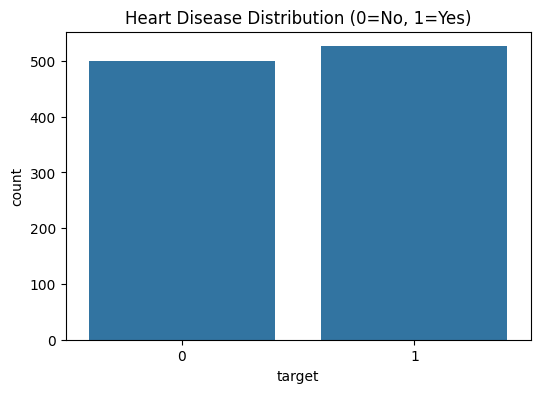

In [24]:
# Heart disease prevalence
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='target')
plt.title('Heart Disease Distribution (0=No, 1=Yes)')
plt.show()

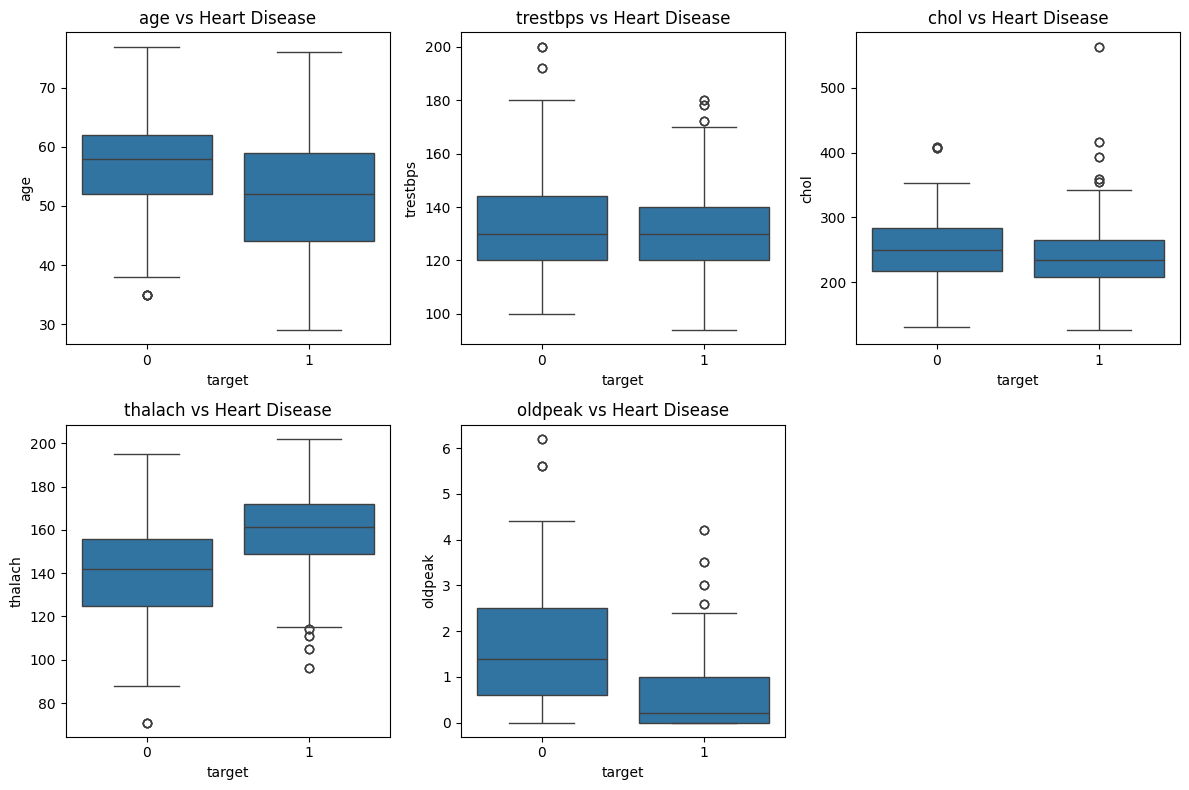

In [25]:
plt.figure(figsize=(12,8))
for i, col in enumerate(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], 1):
    plt.subplot(2,3,i)
    sns.boxplot(data=df, x='target', y=col)
    plt.title(f'{col} vs Heart Disease')
plt.tight_layout()

target
0    58.0
1    52.0
Name: age, dtype: float64


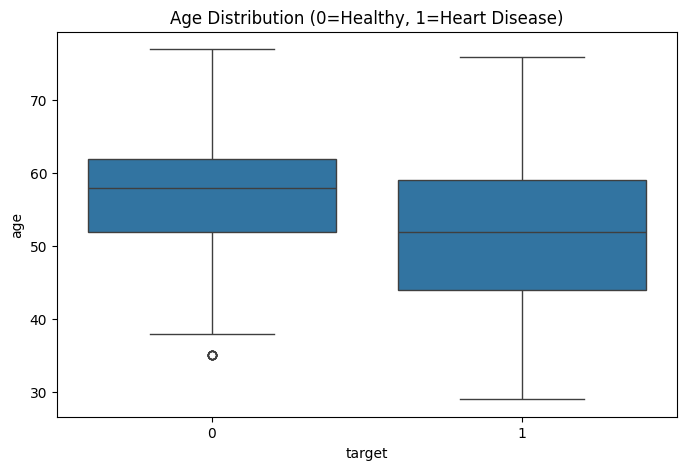

In [26]:
# Check median age by heart disease status
print(df.groupby('target')['age'].median())

# Visual confirmation
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='target', y='age', order=[0,1])
plt.title('Age Distribution (0=Healthy, 1=Heart Disease)')
plt.show()

Text(0.5, 1.0, 'Age distribution by Heart Disease Status')

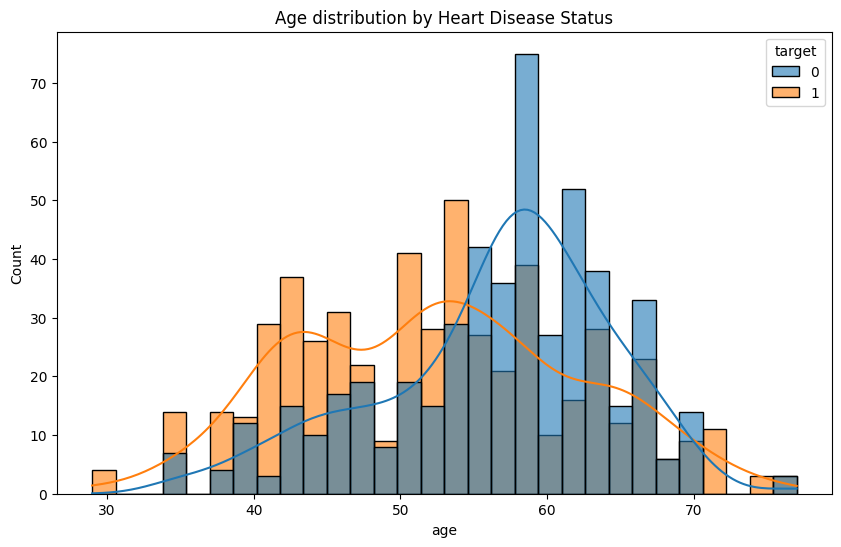

In [27]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x='age',hue='target',kde=True,bins=30,alpha=0.6)
plt.title("Age distribution by Heart Disease Status")

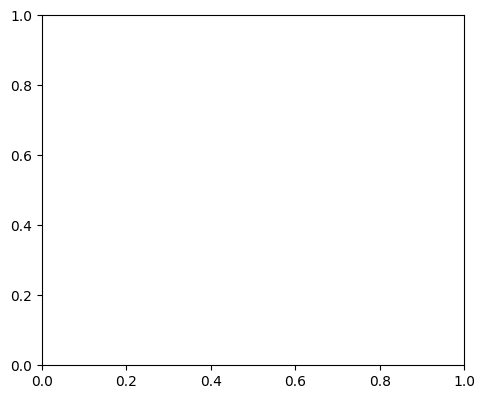

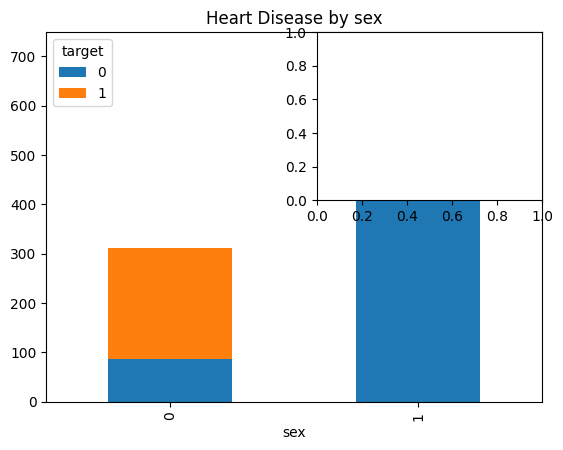

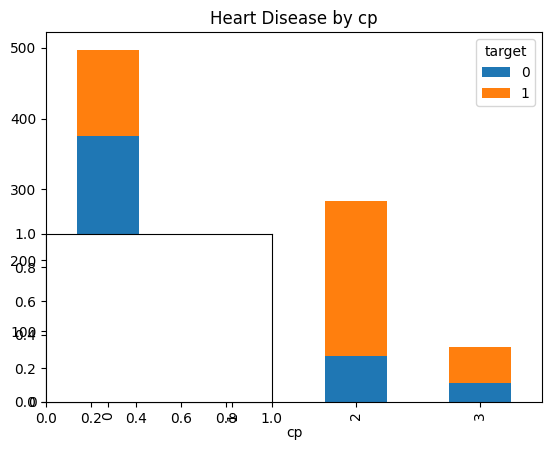

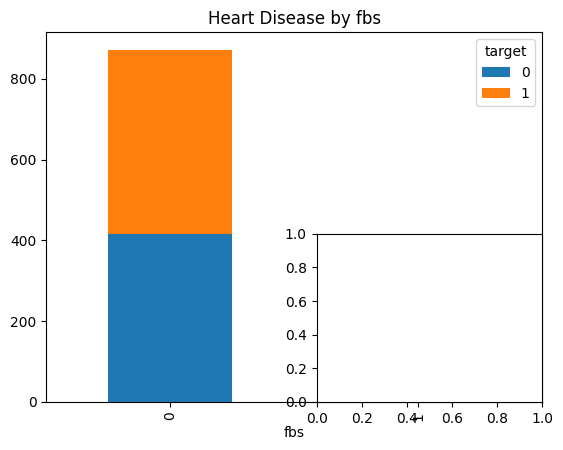

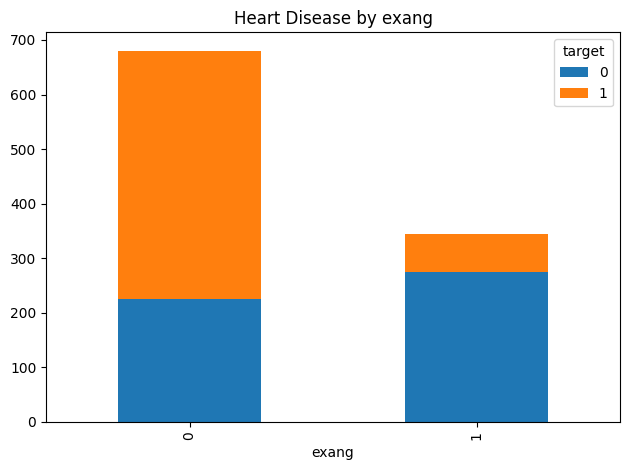

In [28]:
plt.figure(figsize=(12,10))
for i,col in enumerate(['sex','cp','fbs','exang'],1):
    plt.subplot(2,2,i)
    pd.crosstab(df[col], df['target']).plot(kind='bar', stacked=True)
    plt.title(f'Heart Disease by {col}')
plt.tight_layout()

Text(0.5, 1.0, 'Feature Correlation Matrix')

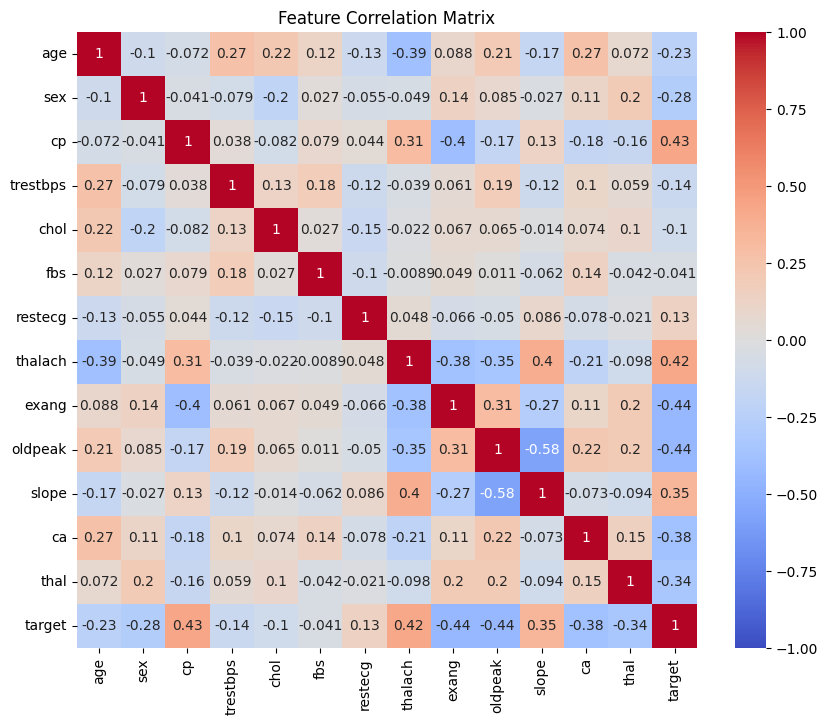

In [29]:
plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')


Text(0.5, 1.0, 'Max Heart Rate by Disease Status and Gender')

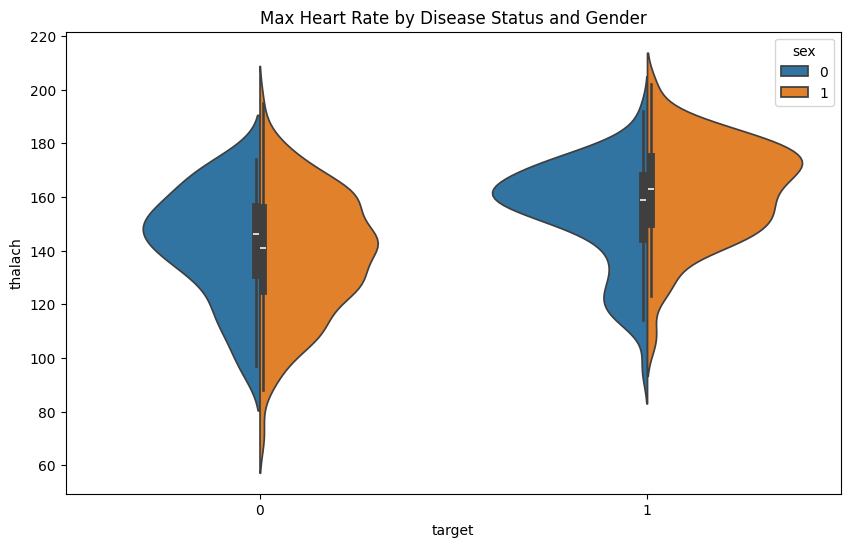

In [30]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='target', y='thalach', hue='sex', split=True)
plt.title('Max Heart Rate by Disease Status and Gender')

Text(0.5, 1.0, 'Cholesterol vs Age Colored by Heart Disease')

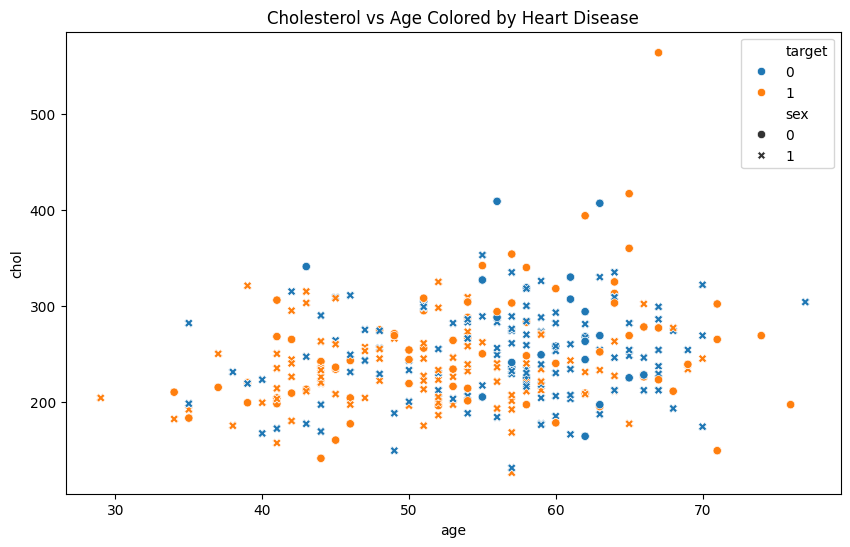

In [31]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='age', y='chol', hue='target', style='sex')
plt.title('Cholesterol vs Age Colored by Heart Disease')


Text(0.5, 1.05, 'Age-Cholesterol Relationship by Sex and Chest Pain Type')

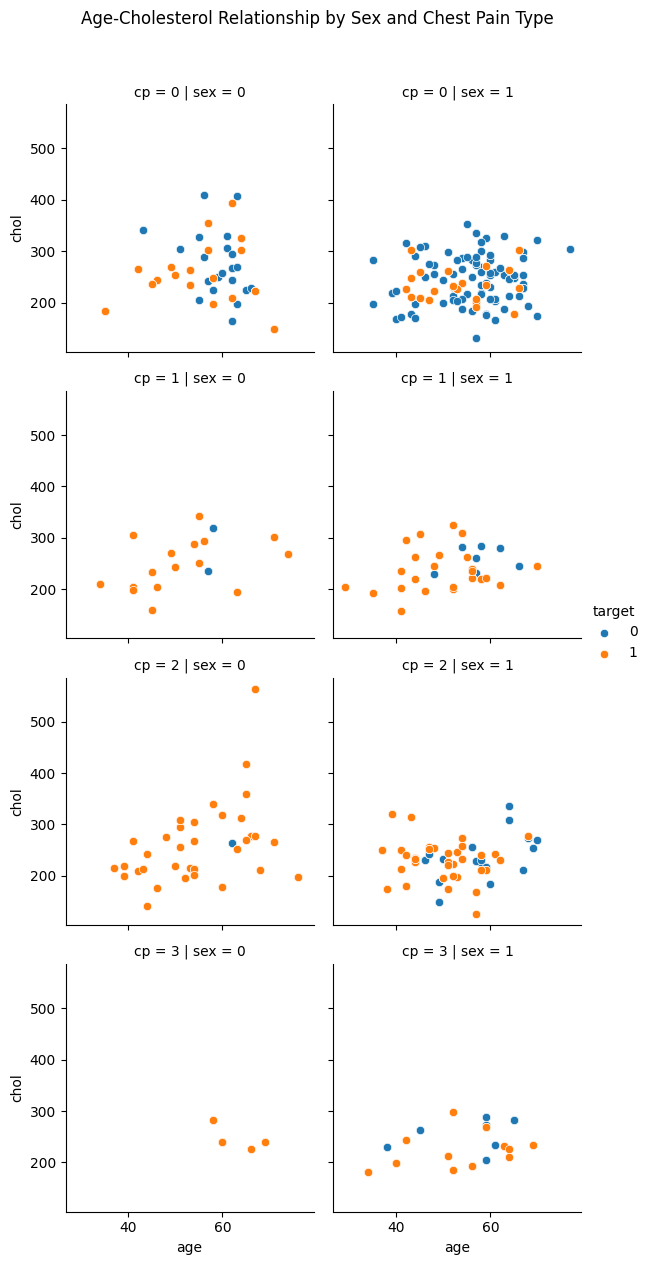

In [32]:
# FacetGrid for multi-dimensional analysis
g = sns.FacetGrid(df, col='sex', row='cp', hue='target')
g.map(sns.scatterplot, 'age', 'chol')
g.add_legend()
plt.suptitle('Age-Cholesterol Relationship by Sex and Chest Pain Type', y=1.05)

In [33]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


Feature Engineering


In [34]:
df['age_bin'] = pd.cut(df['age'],bins=[20,40,60,80])
df['bp_hr_ratio'] = df['trestbps']/df['thalach']
df['high_chol'] = (df['chol']>240).astype(int)


In [35]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_bin,bp_hr_ratio,high_chol
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,"(40, 60]",0.744048,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,"(40, 60]",0.903226,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,"(60, 80]",1.160000,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,"(60, 80]",0.919255,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,"(60, 80]",1.301887,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,"(40, 60]",0.853659,0
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,"(40, 60]",0.886525,1
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,"(40, 60]",0.932203,1
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,"(40, 60]",0.691824,1


In [36]:
# one hot coding
df = pd.get_dummies(df,columns=['cp','restecg','slope','thal'])

In [37]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [38]:
scaler = StandardScaler()
df[['age','trestbps','chol','thalach']] = scaler.fit_transform(df[['age','trestbps','chol','thalach']] )



In [39]:
df

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,-0.268437,1,-0.377636,-0.659332,0,0.821321,0,1.0,2,0,...,False,True,False,False,False,True,False,False,False,True
1,-0.158157,1,0.479107,-0.833861,1,0.255968,1,3.1,0,0,...,True,False,False,True,False,False,False,False,False,True
2,1.716595,1,0.764688,-1.396233,0,-1.048692,1,2.6,0,0,...,False,True,False,True,False,False,False,False,False,True
3,0.724079,1,0.936037,-0.833861,0,0.516900,0,0.0,1,0,...,False,True,False,False,False,True,False,False,False,True
4,0.834359,0,0.364875,0.930822,1,-1.874977,0,1.9,3,0,...,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,1,0.479107,-0.484803,0,0.647366,1,0.0,0,1,...,False,True,False,False,False,True,False,False,True,False
1021,0.613800,1,-0.377636,0.232705,0,-0.352873,1,2.8,1,0,...,True,False,False,False,True,False,False,False,False,True
1022,-0.819834,1,-1.234378,0.562371,0,-1.353113,1,1.0,1,0,...,True,False,False,False,True,False,False,False,True,False
1023,-0.488996,0,-1.234378,0.155137,0,0.429923,0,0.0,0,1,...,True,False,False,False,False,True,False,False,True,False


In [40]:
#drop redundant feature
df.drop(['oldpeak'],axis=1,inplace=True)

Split the data

In [41]:
from sklearn.model_selection import train_test_split


In [42]:
df

,age,sex,trestbps,chol,fbs,thalach,exang,ca,target,age_bin,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,-0.268437,1,-0.377636,-0.659332,0,0.821321,0,2,0,"(40, 60]",...,False,True,False,False,False,True,False,False,False,True
1,-0.158157,1,0.479107,-0.833861,1,0.255968,1,0,0,"(40, 60]",...,True,False,False,True,False,False,False,False,False,True
2,1.716595,1,0.764688,-1.396233,0,-1.048692,1,0,0,"(60, 80]",...,False,True,False,True,False,False,False,False,False,True
3,0.724079,1,0.936037,-0.833861,0,0.516900,0,1,0,"(60, 80]",...,False,True,False,False,False,True,False,False,False,True
4,0.834359,0,0.364875,0.930822,1,-1.874977,0,3,0,"(60, 80]",...,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,1,0.479107,-0.484803,0,0.647366,1,0,1,"(40, 60]",...,False,True,False,False,False,True,False,False,True,False
1021,0.613800,1,-0.377636,0.232705,0,-0.352873,1,1,0,"(40, 60]",...,True,False,False,False,True,False,False,False,False,True
1022,-0.819834,1,-1.234378,0.562371,0,-1.353113,1,1,0,"(40, 60]",...,True,False,False,False,True,False,False,False,True,False
1023,-0.488996,0,-1.234378,0.155137,0,0.429923,0,0,1,"(40, 60]",...,True,False,False,False,False,True,False,False,True,False


In [43]:
df.drop('age_bin', axis=1, inplace=True)  # Remove the binned column

x = df.drop(['target'],axis='columns')  #feature (1 or columns)
y = df['target'] 

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
x_train

,age,sex,trestbps,chol,fbs,thalach,exang,ca,bp_hr_ratio,high_chol,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
835,-0.599275,1,-0.777449,-1.881036,0,-1.005203,0,3,0.936508,0,...,True,False,False,False,False,True,False,False,True,False
137,1.054918,0,2.763755,1.531978,0,0.212479,1,0,1.168831,1,...,False,True,False,False,False,True,False,False,True,False
534,-0.047877,0,-1.348611,0.407235,0,0.777832,0,0,0.646707,1,...,True,False,False,False,False,True,False,False,True,False
495,0.503520,1,0.193526,-0.232705,0,0.516900,0,0,0.838509,0,...,False,True,False,False,True,False,False,False,False,True
244,-0.378716,1,-0.377636,-0.019392,1,0.734343,0,0,0.753012,1,...,True,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,-1.481512,1,-0.092055,-0.620548,0,0.821321,0,0,0.773810,0,...,True,False,False,False,True,False,False,False,True,False
71,0.724079,1,0.479107,-0.756293,0,-0.483339,1,1,1.014493,0,...,True,False,False,False,False,True,False,False,False,True
106,-0.378716,1,0.479107,1.027782,0,1.038764,1,0,0.809249,1,...,False,True,False,False,False,True,False,False,False,True
270,-1.260953,1,-1.234378,-0.678724,0,0.516900,0,0,0.683230,0,...,False,True,False,False,False,True,False,False,False,True


In [45]:
# train baseline model

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score

In [46]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,ca,target,bp_hr_ratio,...,restecg_0,restecg_1,restecg_2,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,-0.268437,1,-0.377636,-0.659332,0,0.821321,0,2,0,0.744048,...,False,True,False,False,False,True,False,False,False,True
1,-0.158157,1,0.479107,-0.833861,1,0.255968,1,0,0,0.903226,...,True,False,False,True,False,False,False,False,False,True
2,1.716595,1,0.764688,-1.396233,0,-1.048692,1,0,0,1.160000,...,False,True,False,True,False,False,False,False,False,True
3,0.724079,1,0.936037,-0.833861,0,0.516900,0,1,0,0.919255,...,False,True,False,False,False,True,False,False,False,True
4,0.834359,0,0.364875,0.930822,1,-1.874977,0,3,0,1.301887,...,False,True,False,False,True,False,False,False,True,False


In [47]:
#Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
y_pred_rf = lr.predict(x_test)

print("Logistic Regression Accuracy: ",accuracy_score(y_test,y_pred_rf))


Logistic Regression Accuracy:  0.8


In [48]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.9853658536585366


              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

[[102   0]
 [  3 100]]


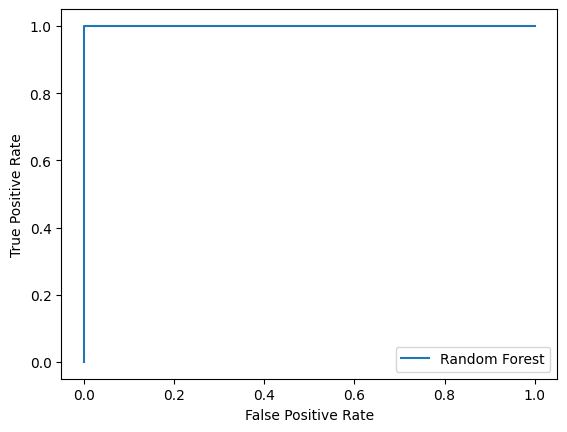

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

print(classification_report(y_test, y_pred_rf))  # Precision, Recall, F1
print(confusion_matrix(y_test, y_pred_rf))      # TN, FP, FN, TP

# ROC Curve (for probability-based models)
y_proba = rf.predict_proba(x_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [50]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(rf, params, cv=5, scoring='f1')
grid.fit(x_train, y_train)
print("Best Params:", grid.best_params_)

Best Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


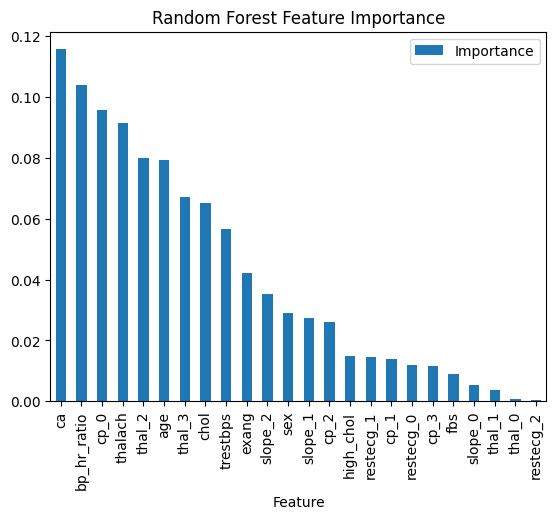

In [51]:
importances = rf.feature_importances_
feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': importances})
feature_importance.sort_values('Importance', ascending=False).plot(kind='bar', x='Feature')
plt.title("Random Forest Feature Importance")
plt.show()

In [52]:

from xgboost import XGBClassifier

xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False)
xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))



XGBoost Accuracy: 0.9853658536585366


d:\projects\health_analyzer\venv\lib\site-packages\xgboost\core.py:158: UserWarning: [23:01:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [53]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, x, y, cv=5, scoring='f1')
print("Cross-Validation F1 Scores:", scores.mean())

Cross-Validation F1 Scores: 0.9972093023255815


In [54]:
import joblib

joblib.dump(rf, 'heart_disease_model.pkl')  # Save
model = joblib.load('heart_disease_model.pkl')  # Load

In [55]:
print("Model expects these features:", model.feature_names_in_)

Model expects these features: ['age' 'sex' 'trestbps' 'chol' 'fbs' 'thalach' 'exang' 'ca' 'bp_hr_ratio'
 'high_chol' 'cp_0' 'cp_1' 'cp_2' 'cp_3' 'restecg_0' 'restecg_1'
 'restecg_2' 'slope_0' 'slope_1' 'slope_2' 'thal_0' 'thal_1' 'thal_2'
 'thal_3']


In [56]:

# 1. Start with raw input (what you'd get from a form)
raw_input = {
    'age': 52,
    'sex': 1,          # 1=male, 0=female
    'cp': 2,           # 0-3
    'trestbps': 125,   # resting BP
    'chol': 212,       # cholesterol
    'fbs': 0,          # fasting blood sugar
    'restecg': 1,      # 0-2
    'thalach': 168,    # max heart rate
    'exang': 0,        # exercise angina
    'oldpeak': 1.0,    # ST depression
    'slope': 2,        # 0-2
    'ca': 0,           # 0-3
    'thal': 3          # 0-3
}

# 2. Create DataFrame with raw values
df = pd.DataFrame([raw_input])

# 3. Feature engineering (MUST match what you did during training)
df['bp_hr_ratio'] = df['trestbps'] / df['thalach']
df['high_chol'] = (df['chol'] > 240).astype(int)

# 4. One-hot encode categoricals (cp, restecg, slope, thal)
for col in ['cp', 'restecg', 'slope', 'thal']:
    dummies = pd.get_dummies(df[col], prefix=col, dtype=int)
    df = pd.concat([df, dummies], axis=1)
    df.drop(col, axis=1, inplace=True)

# 5. Add any missing columns (with 0 values)
expected_cols = model.feature_names_in_
for col in expected_cols:
    if col not in df.columns:
        df[col] = 0

# 6. Reorder columns to match training exactly
df = df[expected_cols]

# 7. Make prediction
try:
    prediction = model.predict(df)
    probability = model.predict_proba(df)[0][1]
    
    print(f"Prediction: {'High Risk' if prediction[0] else 'Low Risk'}")
    print(f"Probability: {probability:.1%}")
    print("\nDebug Info:")
    print(f"Input shape: {df.shape}")
    print(f"Columns match: {all(df.columns == expected_cols)}")
    
except Exception as e:
    print(f"Error: {str(e)}")
    print("\nColumn mismatch:")
    print("Expected:", expected_cols)
    print("Got:", df.columns.tolist())

Prediction: High Risk
Probability: 68.0%

Debug Info:
Input shape: (1, 24)
Columns match: True
